# Importation des données

In [1]:
import seaborn as sns
import pandas as pd

circo = pd.read_csv("/Users/louise/Documents/GitHub/projetpython/1. Rassemblement des données/basefinale.csv", ";")
deputes = pd.read_csv("/Users/louise/Documents/GitHub/projetpython/1. Rassemblement des données/caract_deputes.csv", ";")
deputes["cat_soc_pro"] = deputes["cat_soc_pro"].fillna("Inconnue")
participation = pd.read_csv("/Users/louise/Documents/GitHub/projetpython/1. Rassemblement des données/participation.csv", ";")
basevraimentfinale = pd.merge(deputes, circo, on=['DEPSIR'], how='left')
basevraimentfinale = pd.merge(basevraimentfinale, participation, on=['DEPSIR'], how='left')
basevraimentfinale

,nom_x,nom_de_famille,prenom,sexe,date_naissance,num_deptmt,nom_circo,num_circo,mandat_debut,mandat_fin,...,hemicycle_interventions,hemicycle_interventions_courtes,propositions_ecrites,propositions_signees,questions_ecrites,questions_orales,rapports,semaines_presence,mois,annee
0,Cédric Roussel,Roussel,Cédric,1,1972-10-10,06,Alpes-Maritimes,3,2017-06-21,NaN,...,0,0,0,0,0,0,0,1,6,2017
1,Cédric Roussel,Roussel,Cédric,1,1972-10-10,06,Alpes-Maritimes,3,2017-06-21,NaN,...,0,0,0,0,0,0,0,3,7,2017
2,Cédric Roussel,Roussel,Cédric,1,1972-10-10,06,Alpes-Maritimes,3,2017-06-21,NaN,...,0,0,0,1,0,0,0,1,8,2017
3,Cédric Roussel,Roussel,Cédric,1,1972-10-10,06,Alpes-Maritimes,3,2017-06-21,NaN,...,0,0,0,0,0,0,0,1,9,2017
4,Cédric Roussel,Roussel,Cédric,1,1972-10-10,06,Alpes-Maritimes,3,2017-06-21,NaN,...,0,2,0,1,0,0,0,4,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30889,Victor Habert-Dassault,Habert-Dassault,Victor,1,1992-07-12,60,Oise,1,2021-06-07,NaN,...,0,0,0,3,11,0,0,0,8,2021
30890,Victor Habert-Dassault,Habert-Dassault,Victor,1,1992-07-12,60,Oise,1,2021-06-07,NaN,...,0,0,0,0,4,0,0,2,9,2021
30891,Victor Habert-Dassault,Habert-Dassault,Victor,1,1992-07-12,60,Oise,1,2021-06-07,NaN,...,0,0,0,0,4,0,0,2,10,2021
30892,Victor Habert-Dassault,Habert-Dassault,Victor,1,1992-07-12,60,Oise,1,2021-06-07,NaN,...,0,0,0,1,2,0,0,4,11,2021


# Création des barplots

In [2]:
deputes['cat_soc_pro'].unique()
len(deputes['cat_soc_pro'].unique())
pd.set_option('display.max_columns', None)
basevraimentfinale.columns

Index(['nom_x', 'nom_de_famille', 'prenom', 'sexe', 'date_naissance',
       'num_deptmt', 'nom_circo', 'num_circo', 'mandat_debut', 'mandat_fin',
       ...
       'hemicycle_interventions', 'hemicycle_interventions_courtes',
       'propositions_ecrites', 'propositions_signees', 'questions_ecrites',
       'questions_orales', 'rapports', 'semaines_presence', 'mois', 'annee'],
      dtype='object', length=118)

In [ ]:
From sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.pcs[array(['Professions libérales et assimilés', 'Commerçants et assimilés',
       "Cadres d'entreprise", "Chefs d'entreprise de 10 salariés ou plus",
       'Cadres de la fonction publique, professions intellectuelles et  artistiques',
       'Artisans',
       "Professions intermédiaires de l'enseignement, de la santé, de la fonction publique et assimilés",
       'Employés de la fonction publique', 'Sans profession déclarée',
       'Agriculteurs exploitants', "Employés administratifs d'entreprise",
       'Employés de commerce', 'Contremaîtres, agents de maîtrise',
       'Ouvriers agricoles', 'Anciens employés et ouvriers',
       'Ouvriers qualifiés',
       'Anciens cadres et professions intermédiaires',
       'Professions intermédiaires administratives et commerciales des entreprises',
       'Anciens agriculteurs exploitants',
       "Anciens artisans, commerçants, chefs d'entreprise",
       'Inactifs divers (autres que retraités)', "Inconnue"], dtype=object), array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], dtype=object)]

pcs_dep = sns.histplot(data = deputes, x = "pcs", stat='count')

In [ ]:
sexe_depute = sns.histplot(data = deputes, x = "sexe", stat='probability')

In [ ]:
ancrage_local_depute = sns.histplot(data = deputes, x = "ancrage_local", stat='probability')

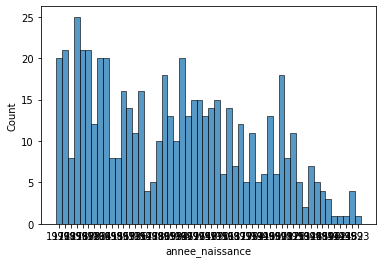

In [6]:
deputes['annee_naissance'] = deputes['date_naissance'].str[:4]
annee_naiss_dep = plt.hist(x, density=True, bins=30) (data = deputes, x = "annee_naissance", stat='count', bins = )

In [ ]:
nb_mandats_dep = sns.histplot(data = basevraimentfinale, x = 'nb_mandats', stat='probability')

In [ ]:
#ancien_depute = sns.histplot(data = basevraimentfinale, x = 'ancien_depute', stat='probability')

# Création des pairplots et heatmap

In [ ]:
essai = basevraimenfinale.iloc[:,[0,2]])

= sns.heatmap(basevraimentfinale, )